# Comparison

This notebook is for comparing the results from both leg topologies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font',family='serif')

jansen_data = np.loadtxt('jansen_data.csv')
jtime = jansen_data[:,0] # first column
jtheta = jansen_data[:,1]
jtorque = jansen_data[:,2]
jx5 = jansen_data[:,3]
jy5 = jansen_data[:,4]

series_data = np.loadtxt('2dof_data.csv')
stime = series_data[:,0] # first column
stheta1 = series_data[:,1]
stheta2 = series_data[:,2]
stau1 = series_data[:,3]
stau2 = series_data[:,4]

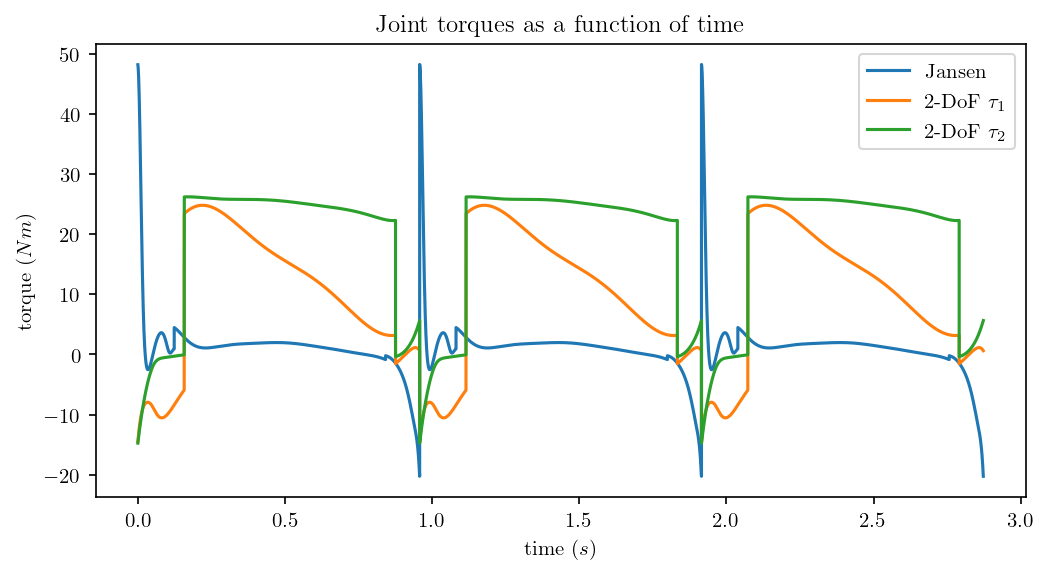

In [2]:
fig_torques = plt.figure(figsize=(8,4), dpi=150)
plt.plot(jtime,jtorque,label=r'Jansen')
plt.plot(jtime,stau1,label=r'2-DoF $\tau_1$')
plt.plot(jtime,stau2,label=r'2-DoF $\tau_2$')
plt.legend()
plt.xlabel(r'time ($s$)')
plt.ylabel(r'torque ($Nm$)')
plt.title(r'Joint torques as a function of time')
plt.savefig('imgout/5_comparison_torques.png',dpi=600)

Jansen power consumption = 4.1989757714744W
2-DoF  power consumption = 15.503244200377708W


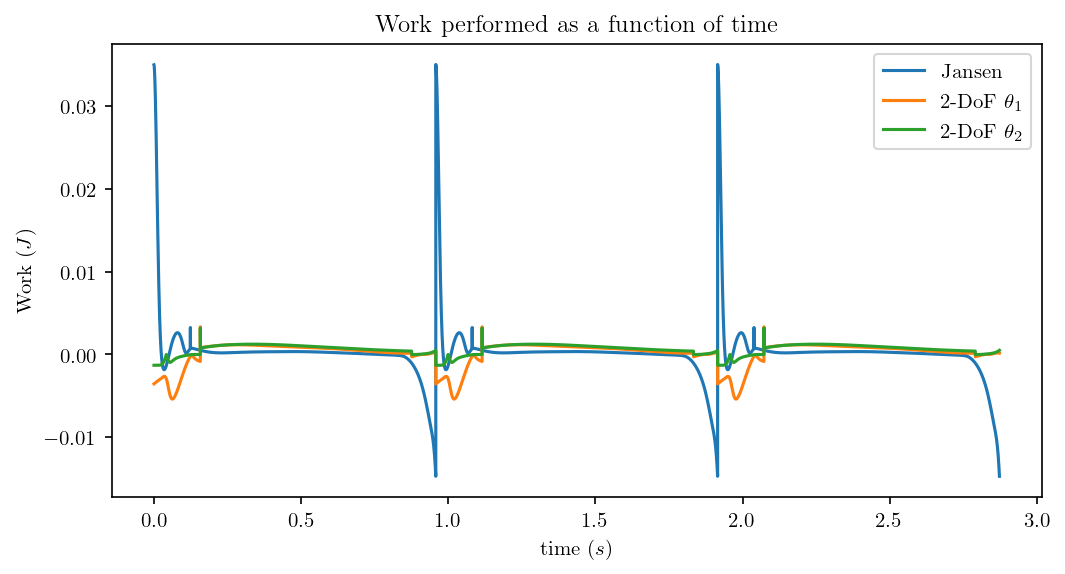

In [8]:
steps = jtime.size
jwork = np.empty(steps)
swork1 = np.empty(steps)
swork2 = np.empty(steps)

jwork[0] = 0
swork1[0] = 0
swork2[0] = 0

for i in range(1,steps,1):
    jwork[i] = jtorque[i] * abs(jtheta[i] - jtheta[i-1])
    swork1[i] = stau1[i] * abs(stheta1[i] - stheta1[i-1])
    swork2[i] = stau2[i] * abs(stheta2[i] - stheta2[i-1])
    
jwork[0] = jwork[1]
swork1[0] = swork1[1]
swork2[0] = swork2[1]

jpower = np.sum(jwork) / jtime[-1]
spower = (np.sum(swork1) + np.sum(swork2)) / jtime[-1]

print('Jansen power consumption = ' + str(jpower) + 'W')
print('2-DoF  power consumption = ' + str(spower) + 'W')

fig_torques = plt.figure(figsize=(8,4), dpi=150)
plt.plot(jtime,jwork,label=r'Jansen')
plt.plot(jtime,swork1,label=r'2-DoF $\theta_1$')
plt.plot(jtime,swork2,label=r'2-DoF $\theta_2$')
plt.legend()
plt.xlabel(r'time ($s$)')
plt.ylabel(r'Work ($J$)')
plt.title(r'Work performed as a function of time')
plt.savefig('imgout/5_comparison_work.png',dpi=600)

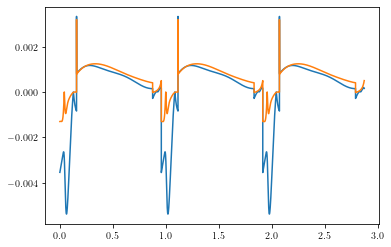

In [7]:
plt.plot(jtime,swork1,label=r'2-DoF $\theta_1$')
plt.plot(jtime,swork2,label=r'2-DoF $\theta_2$')

In [18]:
# Jansen
mini = jtorque[500:6000]
maxjtorque=np.amax(mini)
# double it to approximate what Patnaik got
print('phi Jansen:',2*maxjtorque)
# 2DOF
maxs1torque=np.amax(stau1)
maxs2torque=np.amax(stau2)
print('tau1:',maxs1torque)
print('tau2:',maxs2torque)
print('phi 2dof:',maxs1torque+maxs2torque)

phi Jansen: 8.953047937068401
tau1: 24.812002736648793
tau2: 26.21658982748725
phi 2dof: 51.02859256413605
